### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings


In [223]:
warnings.filterwarnings("ignore")

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [224]:
data = pd.read_csv('data/coupons.csv')

In [225]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [226]:
#data['coupon'].value_counts() #slecting unique values in coupon column

#print(data['coupon'].value_counts())
#print(data['RestaurantLessThan20'].value_counts())
#print(data['Restaurant20To50'].value_counts())
print("Duplicate rows:",data.duplicated().sum()) #check for duplicate rows
print("Null Rows :", data.isnull().all(axis=1).sum()) #check for rows with all null values
print("Total Rows:",data.shape[0])
#Below for loop is to count alpanumeric values in each column for cleanup 
#for col in data.columns:
 #   if (data[col].dtype == 'object'):
  #      print(col,':',(data[col].apply(lambda p: ((not isinstance(p, float)) and (not p.isalnum()))).sum()))
   #     if((data[col].apply(lambda p: ((not isinstance(p, float)) and (not p.isalnum()))).sum()) > 0):
    #        print(data[col].value_counts(), end=" ") 
        #data['col'].str.replace(r'[^a-zA-Z0-9]', '_', regex=True)

#print(data)

Duplicate rows: 74
Null Rows : 0
Total Rows: 12684


3. Decide what to do about your missing data -- drop, replace, other...

In [227]:
#the car column has very few values which would not contribute much so dropping it
#data = data.drop('car', axis=1) 
#converting values of Y to make more readable
data['Y'] = data['Y'].astype(str)
data['Y'] = data['Y'].replace([re.escape(r'1'),re.escape(r'0')],['Accepted','NotAccepted'],regex=True) 

#dropping duplicates and keeping only 1 records
data = data.drop_duplicates(keep='first')


In [228]:
#data = data.apply(lambda x: x.str.replace(' ', '') if x.dtype == "object" else x) #remove spaces from data
#data = data.apply(lambda x: x.str.replace('~', '-') if x.dtype == "object" else x) #remove spaces from data
#data = data.apply(lambda x: x.replace([re.escape(r'('),re.escape(r')')],['',''],regex=True) if x.dtype == "object" else x) #remove paranthesis from data
#data = data.apply(lambda x: x.replace([re.escape(r'&'),re.escape(r'<')],['And','LT'],regex=True) if x.dtype == "object" else x) #make the data mroe readable by translating some special characters

In [229]:
data['coupon'].value_counts()
#data['coupon'] = data['coupon'].replace(re.escape(r'-'),'To',regex=True) #replacing special characters in coupon column

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

In [230]:
data['education'].value_counts()
#data['education'] = data['education'].replace(re.escape(r'-n'),'N',regex=True) #replacing special characters in coupon column

education
Some college - no degree                  4325
Bachelors degree                          4323
Graduate degree (Masters or Doctorate)    1827
Associates degree                         1148
High School Graduate                       899
Some High School                            88
Name: count, dtype: int64

In [231]:
data['income'].value_counts()
#data['income'] = data['income'].replace([re.escape(r'orMore'),re.escape('Lessthan')],['OM','LT'],regex=True) 

income
$25000 - $37499     2006
$12500 - $24999     1825
$37500 - $49999     1795
$100000 or More     1717
$50000 - $62499     1655
Less than $12500    1034
$87500 - $99999      879
$75000 - $87499      856
$62500 - $74999      843
Name: count, dtype: int64

In [232]:
data['Bar'].value_counts()
#data['Bar'] = data['Bar'].replace(r'~','-', regex=True) #replace ~ with - to depict range for consistency 

Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64

In [233]:
#inspect to see if there are columns with any special characters other then '-' which are using for range
#data['CoffeeHouse'].value_counts()
#data['CarryAway'].value_counts()
#data['Restaurant20To50'].value_counts()
#data['RestaurantLessThan20'].value_counts()
#data['Bar'].value_counts()

4. What proportion of the total observations chose to accept the coupon?



In [234]:

#print(data['Y'].value_counts(normalize=True))
#plt.plot(data['Y'].value_counts(normalize=True),x='Y')
totalObs = data['Y'].value_counts(normalize=True)
print(totalObs)
#may be show a pie chart too



Y
Accepted       0.567565
NotAccepted    0.432435
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution of Coupon Column')

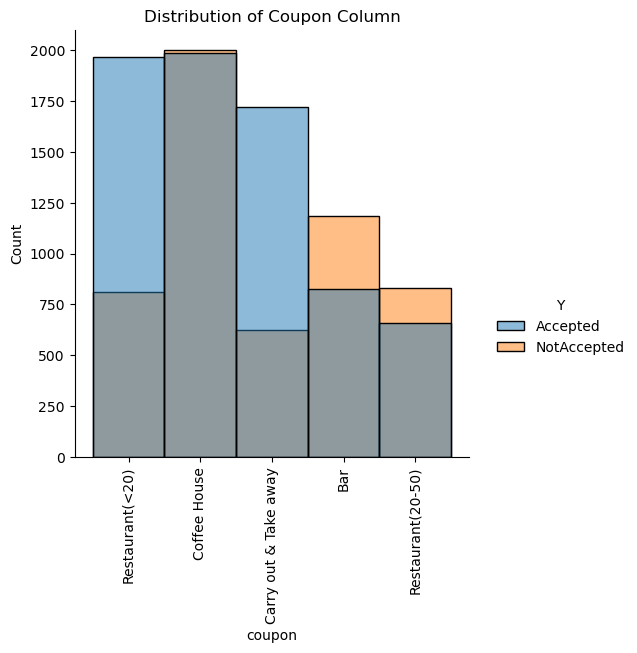

In [235]:
sns.displot(data,x='coupon',hue='Y')
plt.xticks(rotation=90)
plt.title('Distribution of Coupon Column')

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature in Celsius')

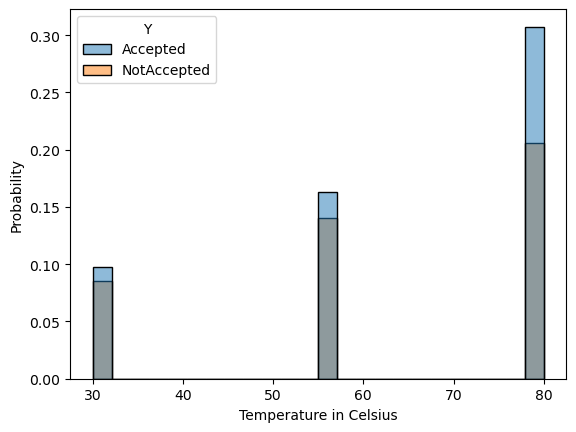

In [236]:
sns.histplot(data=data, x='temperature', hue='Y',stat='probability',common_norm=True)
#data['temperature'].plot.hist(hue='temperature')
plt.xlabel('Temperature in Celsius')

Visualizing Time column with Accepted or not Accepted coupons

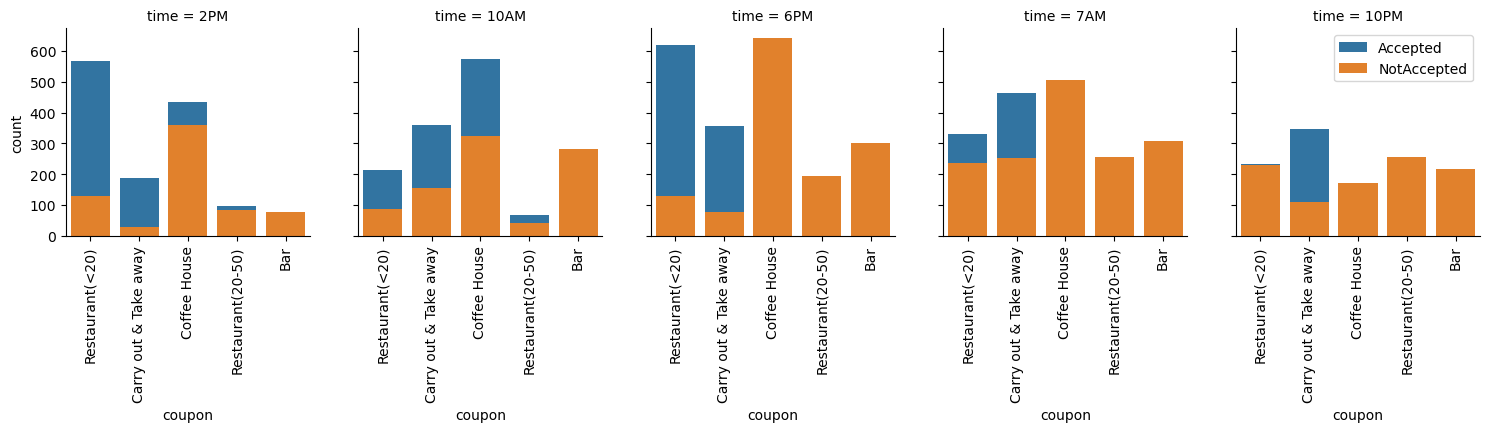

In [237]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="time", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Visualizing expiration column with accepted or not accepted coupons

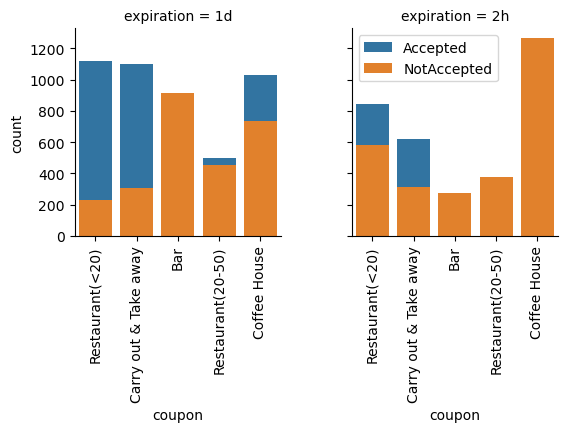

In [238]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="expiration", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Visualizing weather column with accepted or not accepted coupons

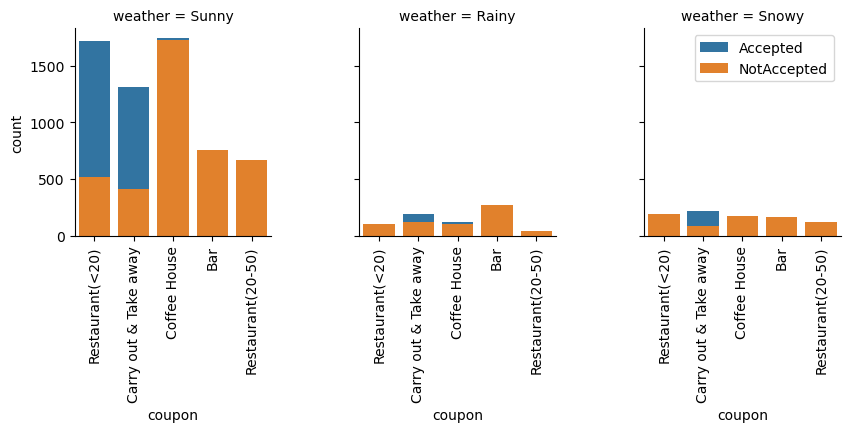

In [239]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="weather", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()


Visualization Destination label with respect Accepted/NotAccepted coupons

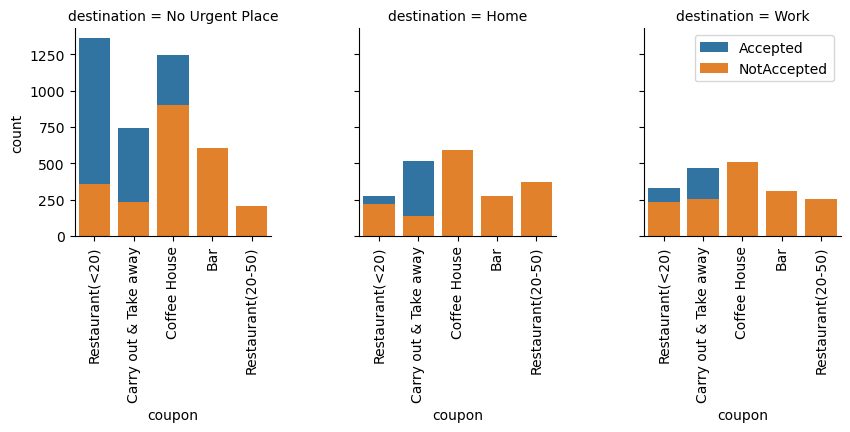

In [240]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="destination", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [241]:
BarCouponData = data[data['coupon'] == 'Bar']
print(type(BarCouponData))

<class 'pandas.core.frame.DataFrame'>


2. What proportion of bar coupons were accepted?


<Axes: ylabel='count'>

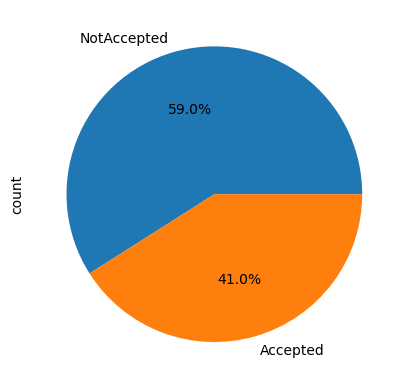

In [242]:
BarCouponData['Y'].value_counts().plot.pie(autopct='%1.1f%%') 
#BarCouponData.plot.pie(y='Y')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


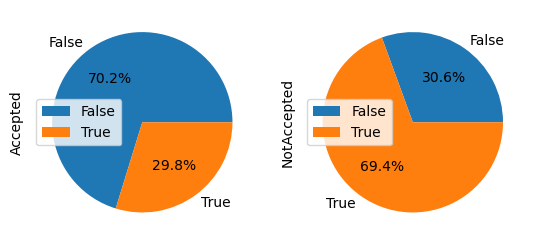

In [243]:
ct = pd.crosstab(BarCouponData['Bar'].str.contains('1-3|never|less1'), BarCouponData['Y'], normalize='index').plot.pie(subplots=True,autopct='%1.1f%%') 


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Bar Coupon Distribution')

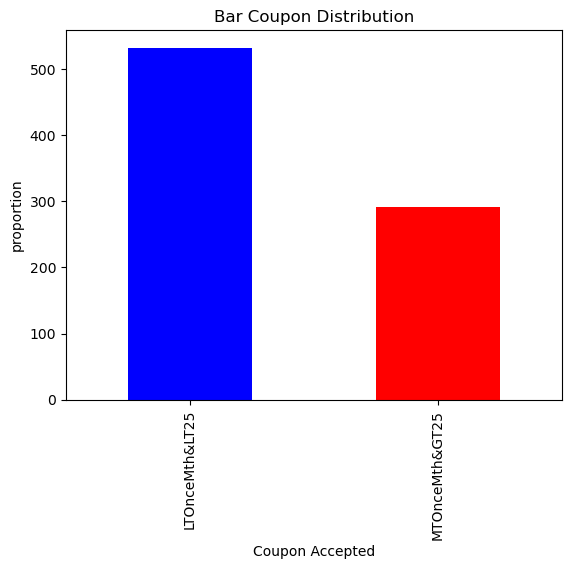

In [244]:
tmp = BarCouponData.query('Y == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                                                     &(BarCouponData['age'].str.contains('26|31|50plus|36|41|46')))[['Y']].value_counts()
tmp.plot.bar(color=['blue','red']) 
plt.xlabel('Coupon Accepted')
plt.xticks([0, 1], [ 'LTOnceMth&LT25', 'MTOnceMth&GT25'])
plt.ylabel('proportion')
plt.title('Bar Coupon Distribution')
#sns.scatterplot(data=data, x='temperature', hue='temperature')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Text(0.5, 1.0, 'Bar Coupon Vs Passenger Wt Kids & Farmers')

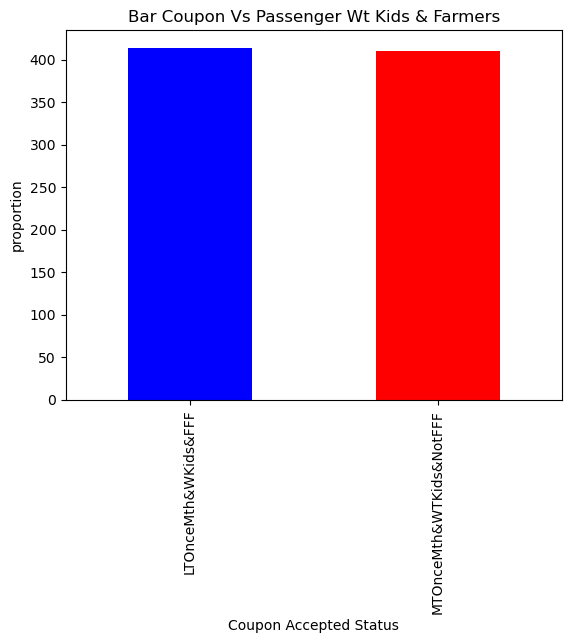

In [245]:
tmp = BarCouponData.query('Y == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                                                     &(BarCouponData['passanger'].str.contains('kids')==False)
                                                     &(BarCouponData['occupation'].str.contains('FarmingFishingAndForestry')==False))['Y'].value_counts()
tmp.plot.bar(color=['blue','red']) 
plt.xlabel('Coupon Accepted Status')
plt.xticks([0, 1], ['LTOnceMth&WKids&FFF', 'MTOnceMth&WTKids&NotFFF'])
plt.ylabel('proportion')
plt.title('Bar Coupon Vs Passenger Wt Kids & Farmers')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



<Axes: xlabel='None,Y'>

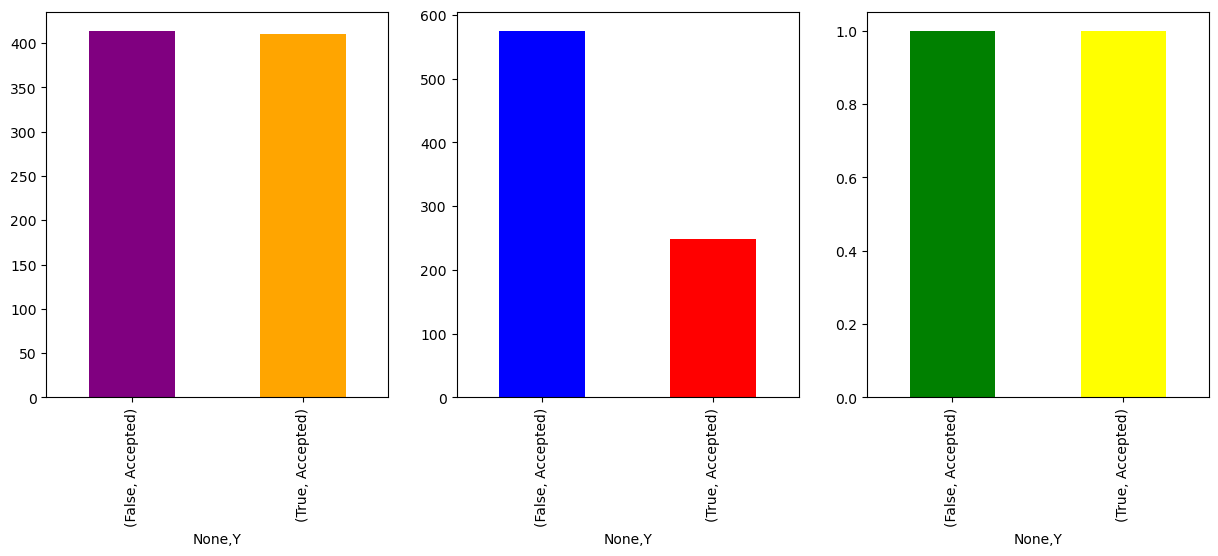

In [246]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
tmp1 = BarCouponData.query('Y == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                                                      &(BarCouponData['passanger'].str.contains('kids')==False)
                   &(BarCouponData['maritalStatus'].str.contains('Widowed')==False))['Y'].value_counts()
tmp2 = BarCouponData.query('Y == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                   &(BarCouponData['age'].str.contains('below21|21|26')))['Y'].value_counts()
tmp3 = BarCouponData.query('Y == "Accepted"').groupby((BarCouponData['RestaurantLessThan20'].str.contains('4-8|gt8'))
                   &(BarCouponData['income'].str.contains('LT$12500|$12500-$24999|$25000-$37499|$37500-$49999|')))['Y'].value_counts(normalize=True)

tmp1.plot.bar(ax=axes[0],color=['purple','orange'])

tmp2.plot.bar(ax=axes[1],color=['blue','red']) 

tmp3.plot.bar(ax=axes[2],color=['green','yellow']) 


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

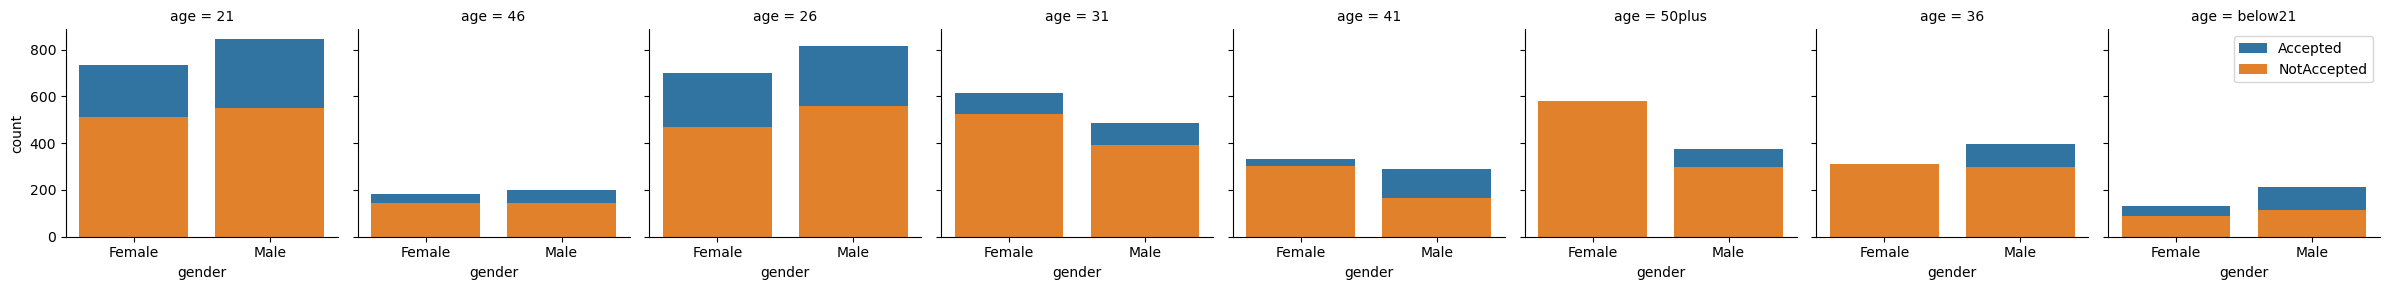

In [247]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="age", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "gender")
plt.legend()
# Show the plot
plt.show()


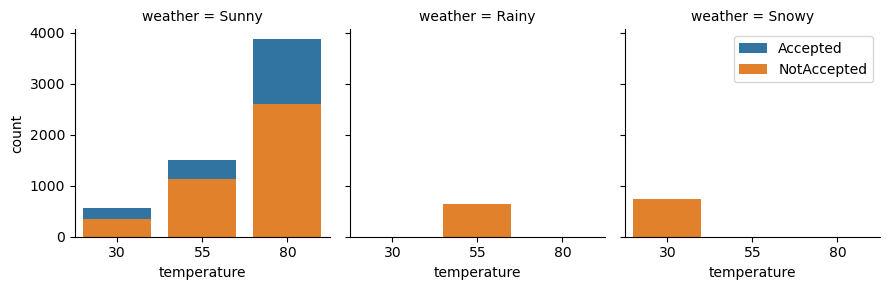

In [248]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="weather", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "temperature")
plt.legend()
# Show the plot
plt.show()

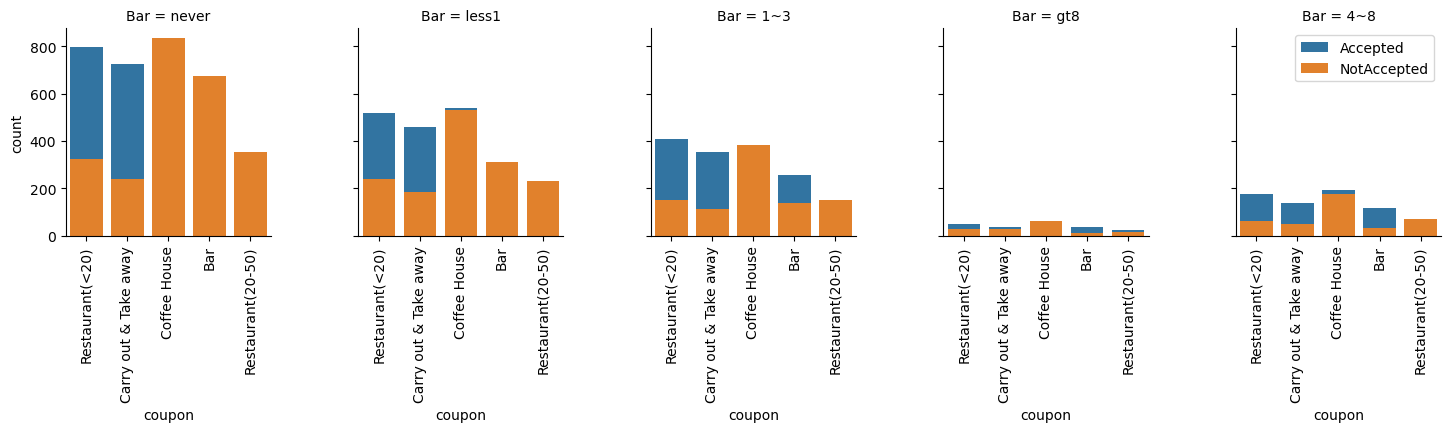

In [249]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="Bar", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

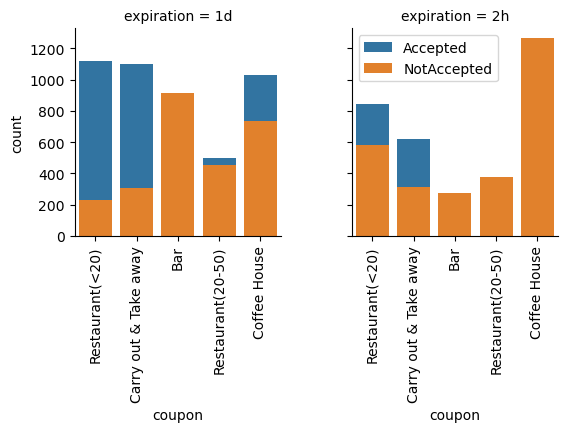

In [250]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="expiration", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

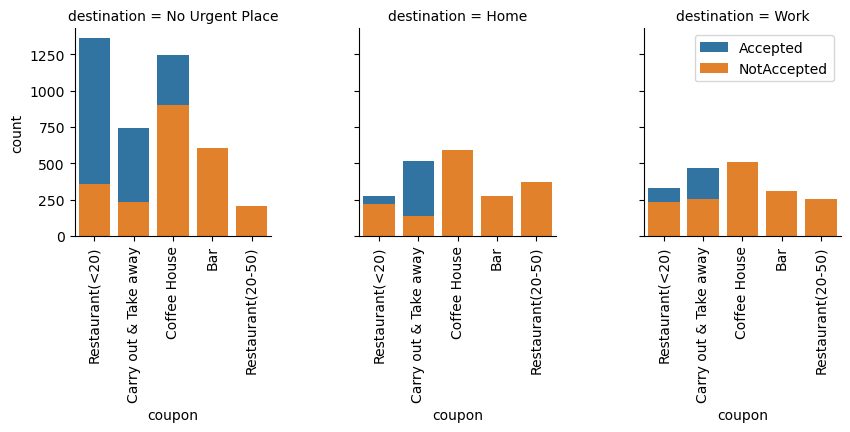

In [251]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="destination", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

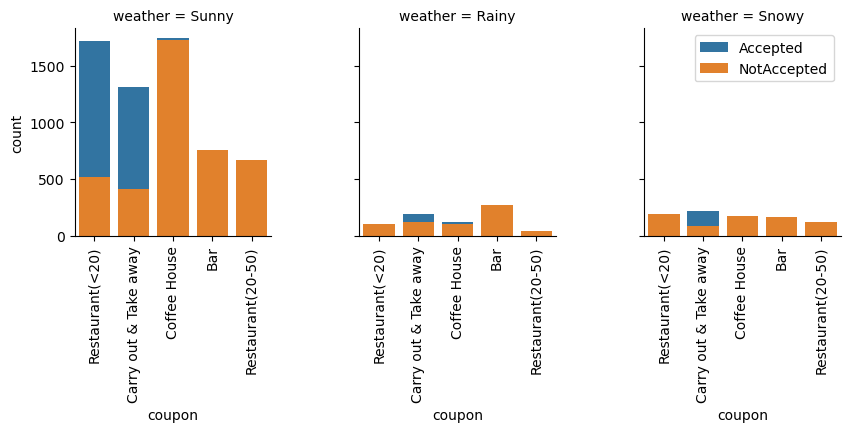

In [252]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="weather", hue="Y")

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

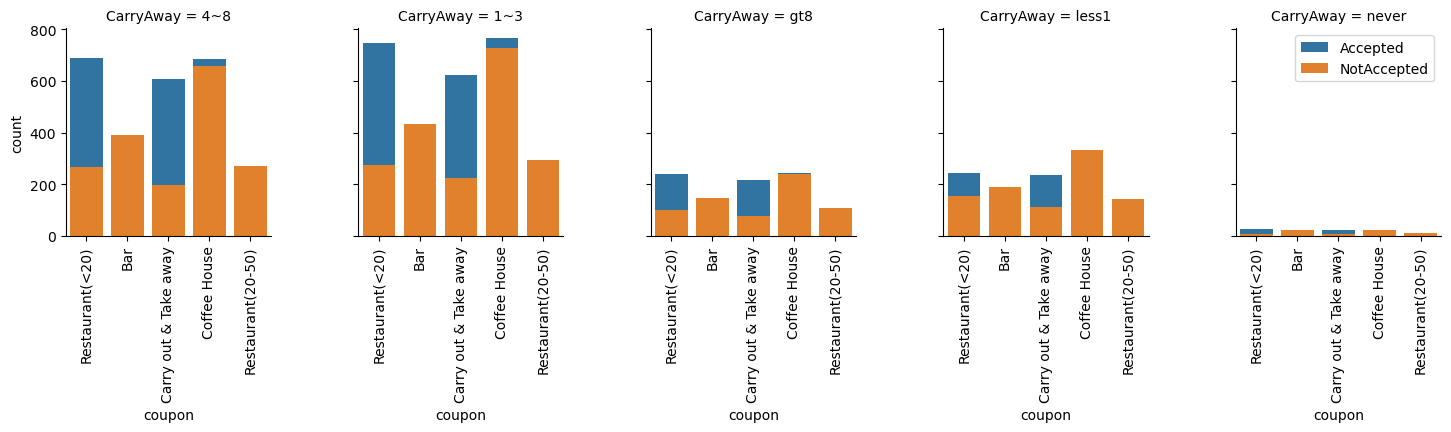

In [253]:
# Create a FacetGrid
g = sns.FacetGrid(data, col='CarryAway', hue="Y")
# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()